In [1]:
# Feature extraction
import musicbrainzngs

# Data processing
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

# Models
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import BaggingRegressor

# PCA and k-fold validation
# from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

# Data Processing

In [2]:
train_file = '../musicrec-data/train.csv'
test_file  = '../musicrec-data/test.csv'
prof_file = '../musicrec-data/profiles.csv'
# change this to reflect different solutions
soln_file  = 'global_median.csv'

# Load the training data.
train_data = {}
with open(train_file, 'r') as train_fh:
    train_csv = csv.reader(train_fh, delimiter=',', quotechar='"')
    next(train_csv, None)
    for row in train_csv:
        user   = row[0]
        artist = row[1]
        plays  = int(row[2])
    
        if not user in train_data:
            train_data[user] = {}
        
        train_data[user][artist] = plays

# Data Exploration: k-means

In [67]:
import pandas as pd
import sklearn.preprocessing as Pre
from sklearn.cluster import KMeans

# Load the training data
profiles = pd.read_csv(prof_file, sep=',')

# Convert categorical data to one-hot
profiles_onehot = pd.get_dummies(profiles,columns=['sex','country'])

# Drop 'user' column
no_user = profiles_onehot.drop(['user'],axis=1)

# Drop 'NaN' values
no_user_dropped = no_user.dropna()

# Standardize data
profiles_std = Pre.scale(no_user_dropped)

In [115]:
null_age_ids = profiles[profiles['age'].isnull()]['user']
null_sex_ids = profiles[profiles['sex'].isnull()]['user']
null_cty_ids = profiles[profiles['country'].isnull()]['user']

# print null_age_ids
# print null_sex_ids
# print null_cty_ids # EMPTY!!!

null = null_age_ids + null_sex_ids
print null.shape
null_ids = set(null)
print len(null_set)

Series([], Name: user, dtype: object)
(55432,)
8946


K:  5
score:  -44517628.382
K:  10
score:  -43646103.292
K:  20
score:  -41706601.2538
K:  50
score:  -36029968.1291
K:  100
score:  -26572367.7604
[-44517628.382014424, -43646103.291965812, -41706601.253807016, -36029968.129050523, -26572367.760373998]


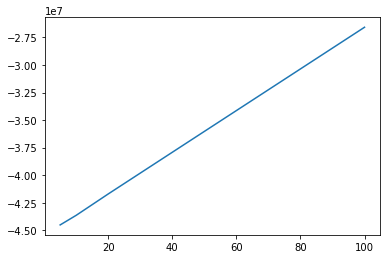

In [72]:
kmeans_scores = []
k_values = [5,10,20,50,100]

for k in k_values:
    # Perform KMeans
    KMeansClassifier = KMeans(n_clusters=k, init='k-means++')
    kmeans = KMeansClassifier.fit(profiles_std)
    score = kmeans.score(profiles_std)
    kmeans_scores.append(score)
    print "K: ", k
    print "score: ", score
    
print kmeans_scores

plt.plot(k_values,kmeans_scores)
plt.show()

# from sklearn.decomposition import PCA
# centers = kmeans.cluster_centers_
# print centers
# pca = PCA(n_components=2)
# pca.fit(centers)
# print pca.explained_variance_ratio_ 
# pca.transform(centers)

In [74]:
# CLUSTER MEDIAN: k=100

# Perform KMeans
KMeansClassifier = KMeans(n_clusters=100, init='k-means++')
kmeans = KMeansClassifier.fit(profiles_std)

# Classify each user to its cluster
cluster_pred = kmeans.predict(profiles_std)
print cluster_pred[:100,:]

[55 65  9 ...,  0  8 22]


In [76]:
# Take the cluster median
# If the user has no data, use the global median.

global_median = 118.0

# Compute the cluster median.
cluster_medians = {}
for user, user_data in train_data.iteritems():
    # check if user_data has any null entries
    if user in null_ids:
        # DO SOMETHING
    else:
        cluster_plays = []
        for artist, plays in user_data.iteritems():
            cluster_plays.append(plays)
        # get cluster index for this user

    cluster_medians[user] = np.median(np.array(user_plays))

# Write out test solutions.
with open(test_file, 'r') as test_fh:
    test_csv = csv.reader(test_fh, delimiter=',', quotechar='"')
    next(test_csv, None)

    with open(soln_file, 'w') as soln_fh:
        soln_csv = csv.writer(soln_fh,
                              delimiter=',',
                              quotechar='"',
                              quoting=csv.QUOTE_MINIMAL)
        soln_csv.writerow(['Id', 'plays'])

        for row in test_csv:
            id     = row[0]
            user   = row[1]
            artist = row[2]

            if user in user_medians:
                soln_csv.writerow([id, user_medians[user]])
            else:
                print "User", id, "not in training data."
                soln_csv.writerow([id, global_median])

array([55, 65,  9, 22, 23,  9, 81, 28,  1, 22, 15,  6, 22,  9,  5,  9,  9,
        8, 26, 36, 23, 17,  9,  0, 77,  5, 23, 23,  0, 12, 22,  0, 12,  0,
       22,  9, 63,  0,  8, 36,  9, 13, 20, 12, 50,  5, 13, 10, 13,  6, 26,
        9, 10,  9,  5,  9, 23, 81, 41,  1, 55,  9,  9, 38,  0, 67, 55, 22,
       14,  9, 63, 50, 23,  9,  3,  9,  9,  9, 12, 45,  0,  9, 47, 12,  0,
        9,  0,  9,  5, 17,  6, 55,  0, 10,  0, 20, 12, 81, 10, 63], dtype=int32)

# globalmedian.py

In [ ]:
# Predict via the median number of plays.

# Compute the global median.
plays_array = []
for user, user_data in train_data.iteritems():
    for artist, plays in user_data.iteritems():
        plays_array.append(plays)
global_median = np.median(np.array(plays_array))
print "global median:", global_median

# Write out test solutions.
with open(test_file, 'r') as test_fh:
    test_csv = csv.reader(test_fh, delimiter=',', quotechar='"')
    next(test_csv, None)

    with open(soln_file, 'w') as soln_fh:
        soln_csv = csv.writer(soln_fh,
                              delimiter=',',
                              quotechar='"',
                              quoting=csv.QUOTE_MINIMAL)
        soln_csv.writerow(['Id', 'plays'])

        for row in test_csv:
            id     = row[0]
            user   = row[1]
            artist = row[2]

            soln_csv.writerow([id, global_median])

# usermedian.py

In [ ]:
# Predict via the user-specific median.
# If the user has no data, use the global median.

# Compute the global median and per-user median.
plays_array  = []
user_medians = {}
for user, user_data in train_data.iteritems():
    user_plays = []
    for artist, plays in user_data.iteritems():
        plays_array.append(plays)
        user_plays.append(plays)

    user_medians[user] = np.median(np.array(user_plays))
global_median = np.median(np.array(plays_array))

# Write out test solutions.
with open(test_file, 'r') as test_fh:
    test_csv = csv.reader(test_fh, delimiter=',', quotechar='"')
    next(test_csv, None)

    with open(soln_file, 'w') as soln_fh:
        soln_csv = csv.writer(soln_fh,
                              delimiter=',',
                              quotechar='"',
                              quoting=csv.QUOTE_MINIMAL)
        soln_csv.writerow(['Id', 'plays'])

        for row in test_csv:
            id     = row[0]
            user   = row[1]
            artist = row[2]

            if user in user_medians:
                soln_csv.writerow([id, user_medians[user]])
            else:
                print "User", id, "not in training data."
                soln_csv.writerow([id, global_median])

# Feature Extraction

In [39]:
# set user agent before any requests are made
musicbrainzngs.set_useragent(2,1)

In [42]:
# function for getting the mode tag for an artist (alphabetical order)
def mode_tag(artist_id):
    result = musicbrainzngs.get_artist_by_id(artist_id,includes=['tags'])
    tags = result['artist']['tag-list']
    mode_tag = None
    mode = None
    for tag_dict in tags:
        if tag_dict['count'] > mode:
            mode = tag_dict['count']
            mode_tag = tag_dict['name']
    return mode_tag

# mode_tag('a74b1b7f-71a5-4011-9441-d0b5e4122711')

'alternative rock'

In [35]:
# read in artist information
artists = pd.read_csv('../musicrec-data/artists.csv', sep=',')
artist_ids = artists['artist'].values

In [68]:
def build_artist_genre_dict(artists):
    artist_genre_dict = {}
    for artist_id in artists:
        print artist_id
        # update artist_genre dict
        try: 
            genre = mode_tag(artist_id)
            artist_genre_dict[artist_id] = genre
        except (KeyError, musicbrainzngs.ResponseError):
            artist_genre_dict[artist_id] = None
    return artist_genre_dict
            
artist_genre_dict = build_artist_genre_dict(artist_ids)

03098741-08b3-4dd7-b3f6-1b0bfa2c879c
69c4cc43-8163-41c5-ac81-30946d27bb69
7a2e6b55-f149-4e74-be6a-30a1b1a387bb
7002bf88-1269-4965-a772-4ba1e7a91eaa
dbf7c761-e332-467b-b4d9-aafe06bbcf8f
a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432
8b0f05ce-354e-4121-9e0b-8b4732ea844f
8363f94f-fd86-41b8-a56b-26eacb34f499
2e41ae9c-afd2-4f20-8f1e-17281ce9b472
c17f08f4-2542-46fb-97f3-3202d60c225a
4bd95eea-b9f6-4d70-a36c-cfea77431553
f467181e-d5e0-4285-b47e-e853dcc89ee7
4d9fb84a-8104-48c1-aa16-21f53c9053cc
3ff72a59-f39d-411d-9f93-2d4a86413013
5f58803e-8c4c-478e-8b51-477f38483ede
ff9deaae-da4f-42b7-a19e-36fedd3fc706
3231d12a-c42d-4977-b2a4-a6e4d87978e1
756cf672-d4ae-4470-a3af-a43d776a211d
8ca01f46-53ac-4af2-8516-55a909c0905e
a0ef7e1d-44ff-4039-9435-7d5fefdeecc9
c83907ee-8b5a-4547-8f68-96572243ea7f
dbbc47a5-1338-4830-9298-a8d0b11c0a46
f4a31f0a-51dd-4fa7-986d-3095c40c5ed9
a9965383-6bdd-49a3-a4bb-4f8008b9d80e
c1e5344e-1bff-4727-9417-a4f55e41b5ff
b5a31e9b-1fa2-45f9-91f5-b3a25fb38038
96c1edac-1011-4cb8-882c-27248de35071
3

ValueError: too many values to unpack

In [82]:
for k,v in artist_genre_dict.iteritems():
    print k
    print v
    break

print len(artist_genre_dict)

03098741-08b3-4dd7-b3f6-1b0bfa2c879c
alternative rock
2000


In [80]:
# SAVE TO CSV
with open('artist_genre_dict.csv', 'wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in artist_genre_dict.items():
        if value:
            writer.writerow([key, value.encode('ascii', 'ignore').decode('ascii')])
        else:
            writer.writerow([key, value])

In [ ]:
def build_user_genre_dict(train_data):
    user_genre_dict = {}
    for user, artist_info in train_data.iteritems():
        print user
        genre_dict = {}
        for artist, plays in artist_info.iteritems():
            genre = artist_genre_dict[artist]
            # only proceed if genre is not None
            if genre: 
                # if the user hasn't already listened to the genre
                if genre not in genre_dict:
                    genre_dict[genre] = (plays, 1)
                # otherwise, add number of plays to current total
                else:
                    (num_genre_plays, num_genre_artists) = genre_dict[genre]
                    genre_dict[genre] = (num_genre_plays + plays, num_genre_artists + 1)
        user_genre_dict[user] = genre_dict
    return user_genre_dict

user_genre_dict = build_user_genre_dict(train_data)

fa40b43298ba3f8aa52e8e8863faf2e2171e0b5d
5909125332c108365a26ccf0ee62636eee08215c
734f7337c7d33e99fa60a6361a5df8e3fb939ecf
e7dde2f288c7b2fe346f9636cfc8fc34f0872aee
0938eb3d1b449b480c4e2431c457f6ead7063a34
e4c6b36e65db3d48474dd538fe74d2dbb5a2e79e
b97479f9a563a5c43b423a976f51fd509e1ec5ba
3bb020df0ff376dfdded4d5e63e2d35a50b3c535
f3fb86c0f024f640cae3fb479f3a27e0dd499891
ed3f59e940c08a34434ecb999cbb184bd4f3fe60
84b0024025a9b85ac11250419f2223cd36171be7
b7931b85a110703e0f8569894636a2e1a110f975
d9ff68589720e79c2646e2d05b4262e716413e24
beb313d271e1b0aee0d43e2598ad606b97246151
11c25963a9ae5012163b415852655ff5443c977f
7970e94ae2fcbcac725c395dfdbaf4cfb7e44e1e
b9a661b805db8a7dcfec13e4800717c43ae89ae5
80460a9d1c784e730a1fe65e16ce5c7945330e6d
e5e50794b2db0d26f0bd0b3a184f194e5bec061c
c37faca0c57b00494e651ecde3904de9fa90ad1f
839c2151683c88bd98ad1ab722c4132a8e716768
359ab576844541274a6a9c25de6c5d2c3afc8276
84cc3f058c77d8c7e1ae84c283933f53af3eb180
02871cd952d607ba69b64e2e107773012c708113
ac9db65cd3c8c7fe

In [83]:
for k,v in user_genre_dict.iteritems():
    print k
    print v
    break
    
print len(user_genre_dict)

fa40b43298ba3f8aa52e8e8863faf2e2171e0b5d
{'folk rock': (237, 1), 'alternative rock': (222, 3), 'finland': (66, 1), 'reggae': (70, 1), 'indie folk': (136, 1), 'pop': (169, 3), 'pop punk': (47, 1), 'british': (351, 3), 'rock': (84, 1), 'indie pop': (72, 1), 'norway': (40, 1), 'folk': (32, 1)}
233286


In [77]:
# SAVE AS CSV
with open('user_genre_dict.csv', 'wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in user_genre_dict.items():
       writer.writerow([key, value])

## Artist information, searching, and browsing

In [6]:
# artist info: year, genre (tag), area, ratings
# user info: age, gender, country

# musicbrainzngs.search_artists("radiohead")
# #musicbrainzngs.search_recordings("bennie and the jets")

# radiohead_id = "a74b1b7f-71a5-4011-9441-d0b5e4122711"
# radiohead_result = musicbrainzngs.get_artist_by_id(radiohead_id,includes=["tags"])#"releases","ratings","tags"])
# radiohead_artist = radiohead_result["artist"]

# print radiohead_artist

# print("name:\t\t%s" % radiohead_artist["name"])
# print("rating:\t\t%s" % radiohead_artist["rating"])
# print("release 0:\t%s" % radiohead_artist["release-list"][0])

# dictionary of recordings for radiohead
# musicbrainzngs.browse_recordings(radiohead_id)

# "artist" can include the following information:
# recordings, releases, release-groups, works, various-artists,
# discids, media, isrcs, aliases, annotation, area-rels, artist-rels,
# label-rels, place-rels, event-rels, recording-rels, release-rels,
# release-group-rels, series-rels, url-rels, work-rels, instrument-rels,
# tags, user-tags, ratings, user-ratings

{'name': 'Radiohead', 'area': {'sort-name': 'United Kingdom', 'iso-3166-1-code-list': ['GB'], 'id': '8a754a16-0027-3a29-b6d7-2b40ea0481ed', 'name': 'United Kingdom'}, 'country': 'GB', 'life-span': {'begin': '1991'}, 'tag-list': [{'count': '7', 'name': 'alternative rock'}, {'count': '1', 'name': 'art pop'}, {'count': '5', 'name': 'art rock'}, {'count': '0', 'name': 'bootleg'}, {'count': '0', 'name': 'britannique'}, {'count': '3', 'name': 'british'}, {'count': '2', 'name': 'britpop'}, {'count': '-1', 'name': u'c\u2019\xe9tait mieux avant'}, {'count': '4', 'name': 'electronic'}, {'count': '0', 'name': 'england'}, {'count': '1', 'name': 'english'}, {'count': '2', 'name': 'experimental rock'}, {'count': '1', 'name': 'grunge'}, {'count': '0', 'name': 'melancholic'}, {'count': '0', 'name': 'nude'}, {'count': '1', 'name': 'oxford'}, {'count': '0', 'name': 'parlophone'}, {'count': '7', 'name': 'rock'}, {'count': '0', 'name': 'rock and indie'}, {'count': '-1', 'name': 'sacred cows'}, {'count': '

In [65]:
artist_id = "f1a95c6b-fb2a-41a6-bfcb-2453fee2a38c"
result = musicbrainzngs.get_artist_by_id(artist_id,includes=["tags"])#"releases","ratings","tags"])
artist = result["artist"]

print artist


ResponseError: caused by: HTTP Error 404: Not Found

## Cover art information

In [42]:
# gets the list of cover art associated with a release
musicbrainzngs.get_image_list("081e7033-5282-4bd7-9963-e64edf8c693a")

# downloads the front cover art of a release
# musicbrainzngs.get_image_front("081e7033-5282-4bd7-9963-e64edf8c693a")

{u'images': [{u'approved': True,
   u'back': False,
   u'comment': u'',
   u'edit': 35299266,
   u'front': True,
   u'id': 11628918400,
   u'image': u'http://coverartarchive.org/release/081e7033-5282-4bd7-9963-e64edf8c693a/11628918400.jpg',
   u'thumbnails': {u'large': u'http://coverartarchive.org/release/081e7033-5282-4bd7-9963-e64edf8c693a/11628918400-500.jpg',
    u'small': u'http://coverartarchive.org/release/081e7033-5282-4bd7-9963-e64edf8c693a/11628918400-250.jpg'},
   u'types': [u'Front']}],
 u'release': u'https://musicbrainz.org/release/081e7033-5282-4bd7-9963-e64edf8c693a'}

# Training

In [12]:
# Function for k-fold cross validation using MAE (mean absolute error)
def kfold(k, model, data):
    kf = KFold(n_splits=k)
    maes = []
    for train_fold_index, validate_fold_index in kf.split(data):
        train_fold = data[train_fold_index]
        test_fold = data[validate_fold_index]
        X_train_fold = train_fold[:, :-1]
        Y_train_fold = train_fold[:, -1]
        X_test_fold = test_fold[:, :-1]
        Y_test_fold = test_fold[:, -1]
        model.fit(X_train_fold, Y_train_fold)
        Y_hat = model.predict(X_test_fold)
        mae = np.mean([abs(Y_hat[i] - Y_test_fold[i]) for i in range(len(Y_test_fold))])
        maes.append(mae)
        print "MAEs: ", maes
    return np.mean(maes)

# Making Predictions

In [ ]:
# Predict via the user-genre median.
# If the user has no data for a particular genre, use the user median.
# If the user has no data, use the global median.

# Compute the global median and per-user median.
plays_array  = []
user_medians = {}
for user, user_data in train_data.iteritems():
    user_plays = []
    for artist, plays in user_data.iteritems():
        plays_array.append(plays)
        user_plays.append(plays)
    user_medians[user] = np.median(np.array(user_plays))
global_median = np.median(np.array(plays_array))

# Write out test solutions.
with open(test_file, 'r') as test_fh:
    test_csv = csv.reader(test_fh, delimiter=',', quotechar='"')
    next(test_csv, None)

    with open(soln_file, 'w') as soln_fh:
        soln_csv = csv.writer(soln_fh,
                              delimiter=',',
                              quotechar='"',
                              quoting=csv.QUOTE_MINIMAL)
        soln_csv.writerow(['Id', 'plays'])

        for row in test_csv:
            id     = row[0]
            user   = row[1]
            artist = row[2]

            if user in user_medians:
                soln_csv.writerow([id, user_medians[user]])
            else:
                print "User", id, "not in training data."
                soln_csv.writerow([id, global_median])